<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Detecting_Cardiac_Ailments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('ECGCvdata.csv')
df.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [3]:
missing_values=df.isnull().sum()

In [4]:
missing_values[missing_values>0]

df.describe(include='all')

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,432.000000,431.000000,1200.000000,1200.000000,1200.000000,1200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARR
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300
mean,600.500000,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,...,199.417894,7.675047,23.915846,-0.071647,0.141737,-0.150496,0.041659,6.442500,8.112425,NaN
std,346.554469,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,...,112.292014,8.452832,25.070324,0.049705,0.073086,0.077532,0.026456,7.748445,10.325033,NaN
min,1.000000,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,...,61.711281,0.000000,0.000000,-0.219938,0.028660,-0.315525,0.008183,0.000000,0.000000,NaN
25%,300.750000,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,...,123.147741,0.000000,0.124186,-0.106660,0.082613,-0.240304,0.023853,1.000000,0.613497,NaN
50%,600.500000,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,...,183.603851,5.228299,19.904060,-0.058518,0.108418,-0.116241,0.034460,3.000000,3.680982,NaN
75%,900.250000,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,...,248.101035,14.355389,46.194325,-0.027685,0.229659,-0.087565,0.049778,10.000000,12.883436,NaN


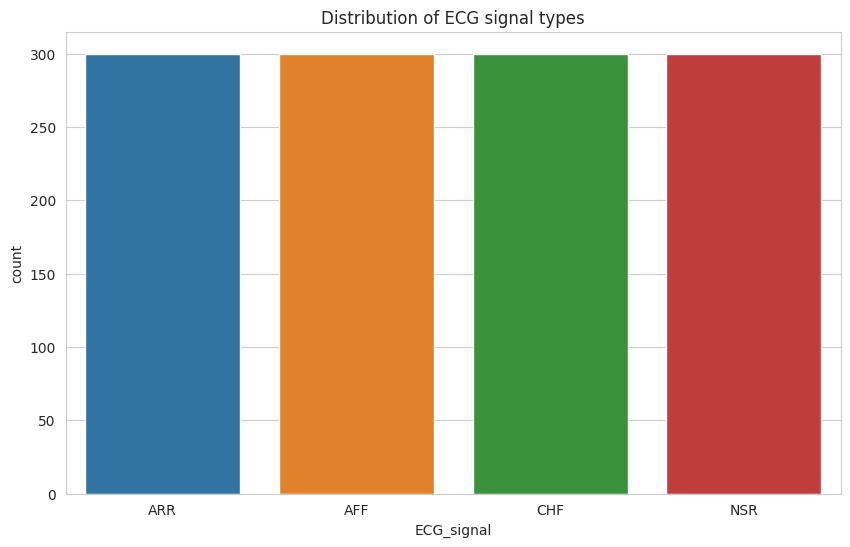

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.countplot(x='ECG_signal',data=df)
plt.title('Distribution of ECG signal types')
plt.show()

<ipython-input-6-732e0720dfb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


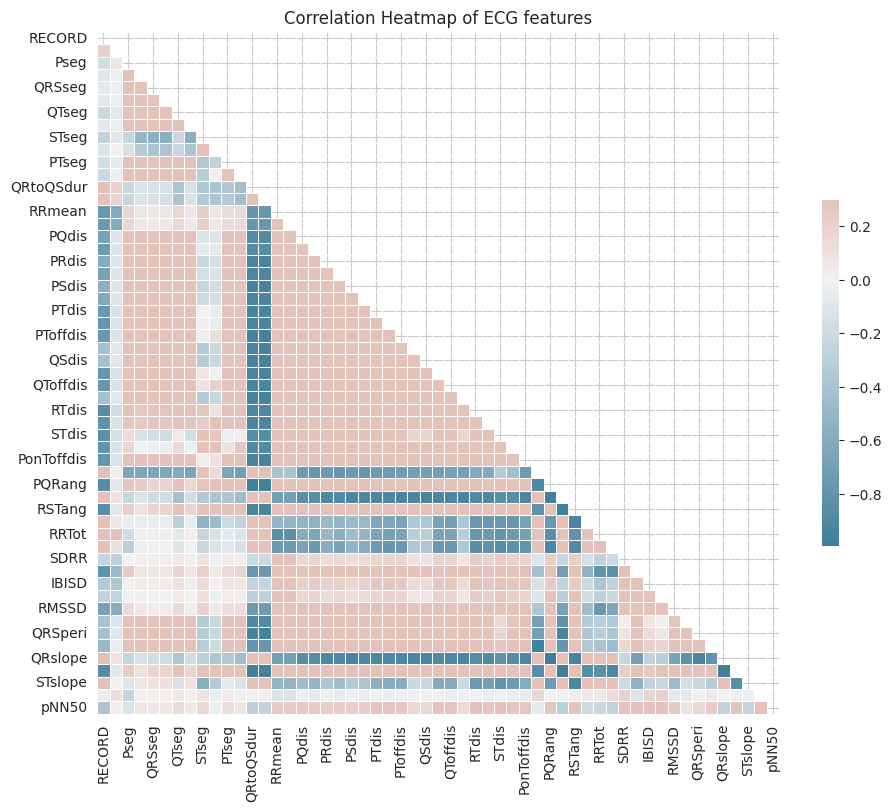

In [6]:
corr=df.corr()

mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,
            square=True,linewidth=.5,cbar_kws={'shrink':.5})
plt.title('Correlation Heatmap of ECG features')
plt.show()

In [7]:
df_filled=df.fillna(df.median())

df_filled.isnull().sum().any()

<ipython-input-7-d22d2cf8cafd>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled=df.fillna(df.median())


False

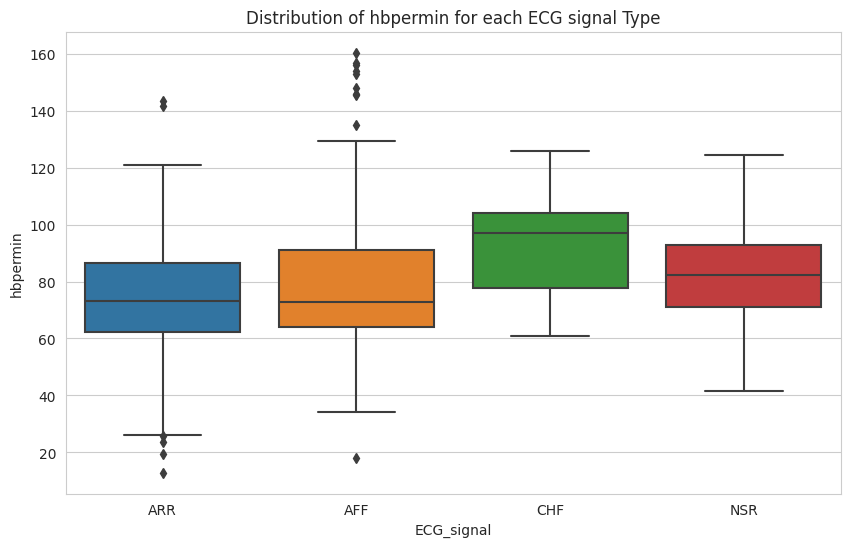

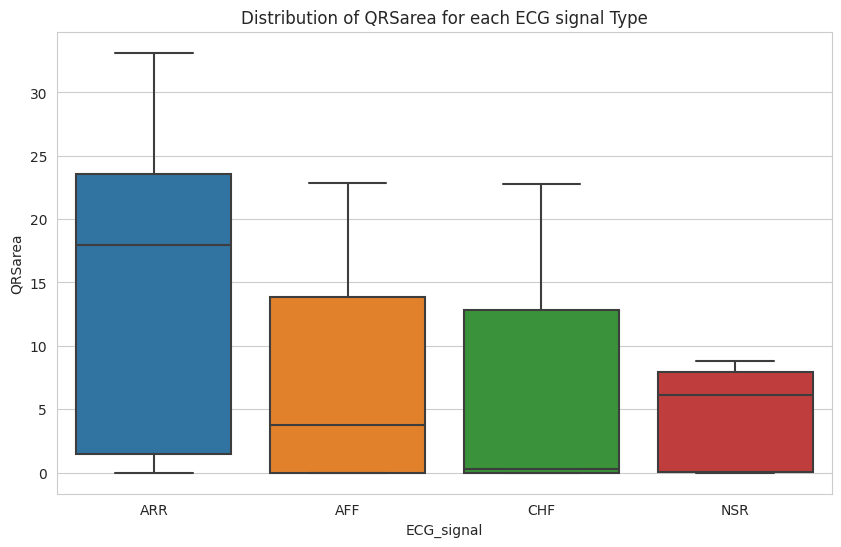

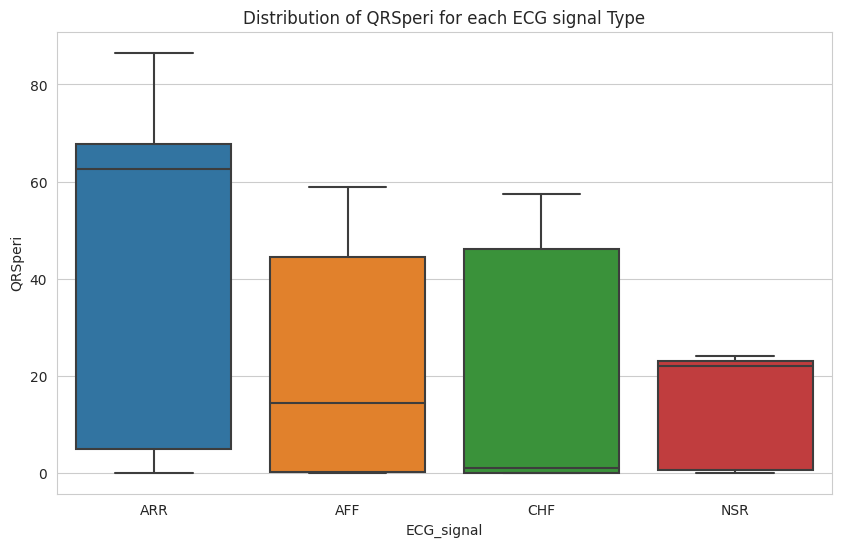

In [8]:
features=['hbpermin','QRSarea','QRSperi']

for feature in features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='ECG_signal',y=feature,data=df_filled)
  plt.title(f'Distribution of {feature} for each ECG signal Type')
  plt.show()

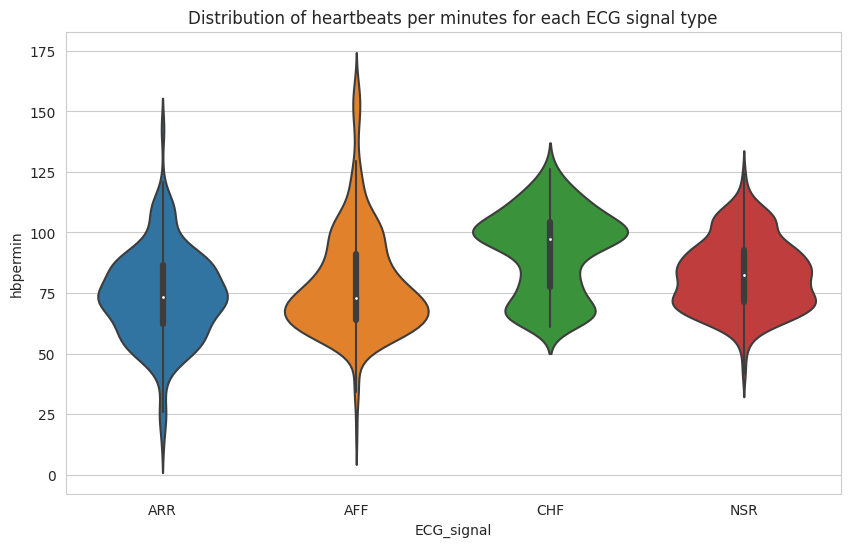

In [10]:
plt.figure(figsize=(10,6))
sns.violinplot(x='ECG_signal',y='hbpermin',data=df_filled)
plt.title('Distribution of heartbeats per minutes for each ECG signal type')
plt.show()

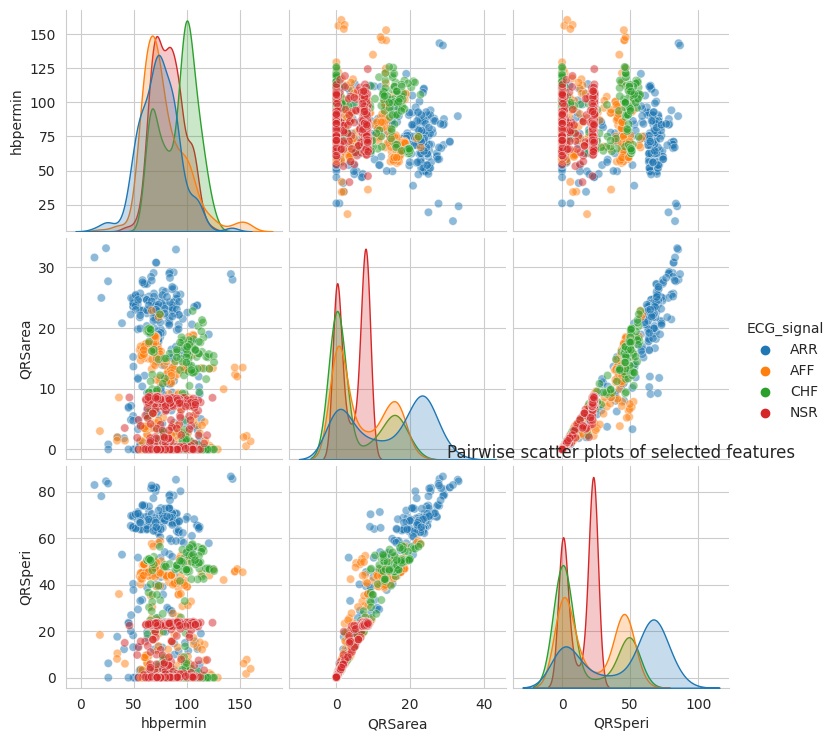

In [11]:
sns.pairplot(df_filled,vars=['hbpermin','QRSarea','QRSperi'],hue='ECG_signal',plot_kws={'alpha':0.5})
plt.title('Pairwise scatter plots of selected features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_filled['ECG_signal']=le.fit_transform(df_filled['ECG_signal'])

X=df_filled.drop('ECG_signal',axis=1)
y=df_filled['ECG_signal']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((960, 55), (240, 55), (960,), (240,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

1.0


In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

lr=LogisticRegression(random_state=42)
svm=SVC(random_state=42)
gbc=GradientBoostingClassifier(random_state=42)

models=[lr,svm,gbc]
model_names=['Logistic Regression', 'Support Vector Machine', 'Gradient Boosting Classifier']


for model,name in zip(models,model_names):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f'{name} Accuracy:{accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:0.9958333333333333
Support Vector Machine Accuracy:0.9875
Gradient Boosting Classifier Accuracy:1.0


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels for roc_auc_score computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Dictionary to store the scores for each model
scores = {}

# Compute the metrics for each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_score = model.decision_function(X_test) if name != 'Gradient Boosting Classifier' else model.predict_proba(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')

    scores[name] = [precision, recall, f1, roc_auc]

# Convert the scores to a DataFrame for easier viewing
scores_df = pd.DataFrame(scores, index=['Precision', 'Recall', 'F1 Score', 'ROC AUC']).transpose()

scores_df

,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.995902,0.995833,0.995832,0.922014
Support Vector Machine,0.987835,0.987500,0.987496,0.996312
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000
